In [1]:
#import stuff!
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

<b>Theory<b>

In [112]:
#Setting up Constants
j = (-1)**(1/2)
R0 = 10000 #Voltage-Setting Resistor [Ohms]
R1 = 200 #Parallel Resistor [Ohms]
R2 = 20 #Series Resistor [Ohms]
C = 0.00022 #Capacitor [Farads]
V0_in = 0.707 #Voltage In [V]

#creating shorthands
R = R2/(R1+R2) #Based on equivalent resistance (unitless)
I0 = V0_in/R0 #I calculated from VAC [A]
wc = 1/((R1+R2)*C) #shorthand frequency constant [rad/s]

#Creating Arrays
f0 = [i for i in range(11000)] #Creating a range of (linear) frequencies [Hz]

w = []
for i in f0:
    w.append(2*np.pi*f0[i])

In [127]:
#Running Loops for Functions


#Impedance Function
Z = []
for i in w:
    Z.append(R1*(1+j*i*R/wc)/(1+j*i/wc))
    
#Real(Z)
ReZ = []
for i in Z:
    ReZ.append(np.real(i))

#Imaginary(Z)
ImZ = []
for i in Z:
    ImZ.append(np.imag(i))
    
#Phase
Ph = []
i = 0
while i < len(ImZ):
    Ph.append(np.arctan(ImZ[i]/ReZ[i]))
    i += 1
    
#Voltage

V0 = []
for i in ReZ:
    V0.append(I0*i)
    

<b>Data<b>

In [128]:
#Set up data. Keep data all in the same order! Also, make sure units are converted to SI first.

f = [1052, 10024, 98, 79] #frequency - Hz
V = [0.01357, 0.01373, 0.01323, 0.01259] #V_0rms - V
P = [0.3299, 0.2601, 0.147, 0.00175] #phase - radians

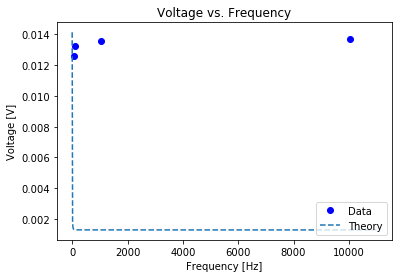

In [129]:
#plotting - Voltage vs Frequency

fig, sp = plt.subplots()

plt.title('Voltage vs. Frequency')
sp.plot(f,V,'bo',label='Data')
sp.plot(f0,V0,'--',label='Theory')
legend = sp.legend(loc='lower right')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Voltage [V]')

plt.show()

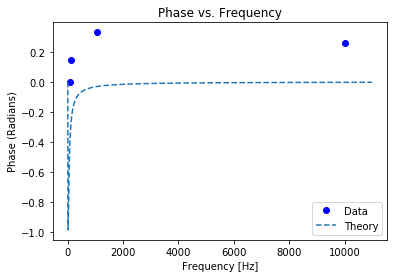

In [130]:
#Plotting - Phase vs Frequency

fig, sp = plt.subplots()

plt.title('Phase vs. Frequency')
sp.plot(f,P,'bo',label='Data')
sp.plot(f0,Ph,'--',label='Theory')
legend = sp.legend(loc='lower right')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase (Radians)')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


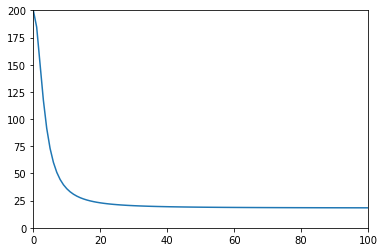

In [145]:
plt.plot(f0,Z)
plt.axis([0,100,0,200])
plt.show()